In [1]:
# importing the required library
import pandas as pd

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr
key ="0f6891050a797b3ec33b81a17ac25f84253f80cf"

In [3]:
inp = input()

IBM


In [4]:
df = pdr.get_data_tiingo(inp, api_key = key)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4196\4131556387.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo(inp, api_key = key)


In [5]:
# df.to_csv('AAPL.csv')
df.head(650)

close      high      low    open   volume  \
symbol date                                                                    
IBM    2018-12-11 00:00:00+00:00  120.89  123.8100  120.000  123.25  5043081   
       2018-12-12 00:00:00+00:00  121.16  122.8800  121.000  122.51  3560790   
       2018-12-13 00:00:00+00:00  120.73  121.7900  120.170  121.26  3993597   
       2018-12-14 00:00:00+00:00  119.90  121.1100  119.440  119.50  4554204   
       2018-12-17 00:00:00+00:00  116.10  119.7800  115.070  119.07  7374476   
...                                  ...       ...      ...     ...      ...   
       2021-07-06 00:00:00+00:00  138.78  140.4200  137.100  139.99  8093747   
       2021-07-07 00:00:00+00:00  139.82  140.3300  138.760  138.76  4059667   
       2021-07-08 00:00:00+00:00  140.74  141.3100  137.660  137.78  5487425   
       2021-07-09 00:00:00+00:00  141.52  141.9800  140.841  141.45  3904059   
       2021-07-12 00:00:00+00:00  140.92  141.9599  140.115  141.43  3342627   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
IBM    2018-12-11 00:00:00+00:00   90.473156   92.658462   89.807087   
       2018-12-12 00:00:00+00:00   90.675222   91.962457   90.555480   
       2018-12-13 00:00:00+00:00   90.353414   91.146710   89.934314   
       2018-12-14 00:00:00+00:00   89.732248   90.637803   89.387987   
       2018-12-17 00:00:00+00:00   86.888357   89.642441   86.117513   
...                                      ...         ...         ...   
       2021-07-06 00:00:00+00:00  117.351866  118.738644  115.931264   
       2021-07-07 00:00:00+00:00  118.231287  118.662541  117.334954   
       2021-07-08 00:00:00+00:00  119.009235  119.491225  116.404798   
       2021-07-09 00:00:00+00:00  119.668800  120.057775  119.094641   
       2021-07-12 00:00:00+00:00  119.161443  120.040778  118.480738   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
IBM    2018-12-11 00:00:00+00:00   92.239362    5275062      0.0          1.0  
       2018-12-12 00:00:00+00:00   91.685552    3724586      0.0          1.0  
       2018-12-13 00:00:00+00:00   90.750062    4177302      0.0          1.0  
       2018-12-14 00:00:00+00:00   89.432891    4763697      0.0          1.0  
       2018-12-17 00:00:00+00:00   89.111082    7713701      0.0          1.0  
...                                      ...        ...      ...          ...  
       2021-07-06 00:00:00+00:00  118.375038    8466059      0.0          1.0  
       2021-07-07 00:00:00+00:00  117.334954    4246411      0.0          1.0  
       2021-07-08 00:00:00+00:00  116.506270    5739846      0.0          1.0  
       2021-07-09 00:00:00+00:00  119.609609    4083645      0.0          1.0  
       2021-07-12 00:00:00+00:00  119.592697    3496387      0.0          1.0  

[650 rows x 12 columns]

In [5]:
df1 = df.reset_index()['close']
df1.head(5)

0    366.76
1    366.60
2    376.79
3    365.71
4    348.42
Name: close, dtype: float64

In [6]:
df1

0       366.76
1       366.60
2       376.79
3       365.71
4       348.42
         ...  
1253    235.58
1254    238.72
1255    239.37
1256    242.64
1257    243.84
Name: close, Length: 1258, dtype: float64

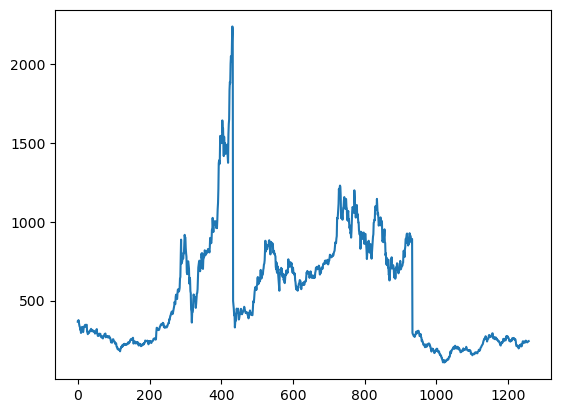

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.12064393],
       [0.12139957],
       [0.12132448],
       ...,
       [0.06161031],
       [0.06314505],
       [0.06370826]])

In [11]:
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_size,test_size

(818, 441)

In [12]:
train_data = df1[0:train_size,:]
train_data.shape

(818, 1)

In [13]:
test_data = df1[train_size:len(df1),:1]
test_data.shape

(441, 1)

In [14]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train)

[[0.12064393 0.12139957 0.12132448 ... 0.05909464 0.06383029 0.06896018]
 [0.12139957 0.12132448 0.12610706 ... 0.06383029 0.06896018 0.06910567]
 [0.12132448 0.12610706 0.12090677 ... 0.06896018 0.06910567 0.06521953]
 ...
 [0.3209537  0.32742121 0.32993687 ... 0.35494802 0.36223218 0.34317696]
 [0.32742121 0.32993687 0.3333349  ... 0.36223218 0.34317696 0.34270762]
 [0.32993687 0.3333349  0.3449323  ... 0.34317696 0.34270762 0.32688616]]


In [17]:
print(X_train.shape), print(ytest.shape)

(717, 100)
(340,)


(None, None)

In [18]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train

array([[[0.12064393],
        [0.12139957],
        [0.12132448],
        ...,
        [0.05909464],
        [0.06383029],
        [0.06896018]],

       [[0.12139957],
        [0.12132448],
        [0.12610706],
        ...,
        [0.06383029],
        [0.06896018],
        [0.06910567]],

       [[0.12132448],
        [0.12610706],
        [0.12090677],
        ...,
        [0.06896018],
        [0.06910567],
        [0.06521953]],

       ...,

       [[0.3209537 ],
        [0.32742121],
        [0.32993687],
        ...,
        [0.35494802],
        [0.36223218],
        [0.34317696]],

       [[0.32742121],
        [0.32993687],
        [0.3333349 ],
        ...,
        [0.36223218],
        [0.34317696],
        [0.34270762]],

       [[0.32993687],
        [0.3333349 ],
        [0.3449323 ],
        ...,
        [0.34317696],
        [0.34270762],
        [0.32688616]]])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 265ms/step - loss: 0.0369 - val_loss: 0.0076
Epoch 2/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0135 - val_loss: 0.0101
Epoch 3/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0091 - val_loss: 0.0055
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0075 - val_loss: 0.0028
Epoch 5/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0070 - val_loss: 0.0018
Epoch 6/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0065 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 8/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 9/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0067 - val_lo

In [44]:
model.save('keras_model.h5')

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.13.0'

In [27]:
train_predict  = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

740.6404780878618

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))

301.11651652576205

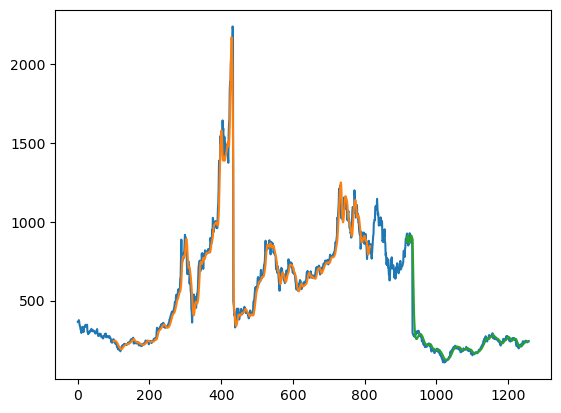

In [31]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,  :]= train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

441

In [33]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [35]:
temp_input

[0.07265388496468213,
 0.07130218477929269,
 0.07554502147232064,
 0.073770914978997,
 0.07333442846079836,
 0.06927932790463004,
 0.07431534977589,
 0.0747799967146176,
 0.07179499213854927,
 0.06852838335719147,
 0.07097364653978833,
 0.0684110482716542,
 0.06727993804707483,
 0.06645859244831388,
 0.06293384647877408,
 0.06441226855654378,
 0.06314974303616268,
 0.061793349447351736,
 0.058601835120737814,
 0.055147490202520355,
 0.05215309881960904,
 0.050402459343392866,
 0.057813343345927304,
 0.0587097833994321,
 0.06043226245511933,
 0.0572313613216624,
 0.061244221247037295,
 0.06135216952573158,
 0.06996925820758923,
 0.06983784291178748,
 0.07039166451552342,
 0.06425738624363457,
 0.06964541337150636,
 0.0675005280078849,
 0.0672987116607608,
 0.06589538403773497,
 0.07766643981883462,
 0.07480346373172506,
 0.07659634383873468,
 0.07882101706052144,
 0.07804660549597539,
 0.073770914978997,
 0.07434351019641894,
 0.0725083894586159,
 0.06927463450120855,
 0.064196371999155

In [36]:
from numpy import array

first_output = []
n_steps = 100
i = 0
while(i<30):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        i = i + 1
        
print(first_output)

[0.06254017]
1 day input [0.07130218 0.07554502 0.07377091 0.07333443 0.06927933 0.07431535
 0.07478    0.07179499 0.06852838 0.07097365 0.06841105 0.06727994
 0.06645859 0.06293385 0.06441227 0.06314974 0.06179335 0.05860184
 0.05514749 0.0521531  0.05040246 0.05781334 0.05870978 0.06043226
 0.05723136 0.06124422 0.06135217 0.06996926 0.06983784 0.07039166
 0.06425739 0.06964541 0.06750053 0.06729871 0.06589538 0.07766644
 0.07480346 0.07659634 0.07882102 0.07804661 0.07377091 0.07434351
 0.07250839 0.06927463 0.06419637 0.06518668 0.06383967 0.06214066
 0.06490038 0.06670265 0.06735034 0.06497078 0.07183723 0.07131626
 0.07154155 0.07113792 0.07299181 0.07269613 0.07076244 0.06712506
 0.06843921 0.0688757  0.06316382 0.05257081 0.04875977 0.04880201
 0.05088588 0.04896158 0.04583578 0.04655856 0.04189332 0.04352662
 0.04578884 0.05181987 0.05250041 0.05217657 0.05354235 0.05350949
 0.04781639 0.05000821 0.05426044 0.0606904  0.06323892 0.05889752
 0.05923075 0.05984089 0.0624692  0.0

8 day output [[0.06342026]]
9 day input [0.06852838 0.07097365 0.06841105 0.06727994 0.06645859 0.06293385
 0.06441227 0.06314974 0.06179335 0.05860184 0.05514749 0.0521531
 0.05040246 0.05781334 0.05870978 0.06043226 0.05723136 0.06124422
 0.06135217 0.06996926 0.06983784 0.07039166 0.06425739 0.06964541
 0.06750053 0.06729871 0.06589538 0.07766644 0.07480346 0.07659634
 0.07882102 0.07804661 0.07377091 0.07434351 0.07250839 0.06927463
 0.06419637 0.06518668 0.06383967 0.06214066 0.06490038 0.06670265
 0.06735034 0.06497078 0.07183723 0.07131626 0.07154155 0.07113792
 0.07299181 0.07269613 0.07076244 0.06712506 0.06843921 0.0688757
 0.06316382 0.05257081 0.04875977 0.04880201 0.05088588 0.04896158
 0.04583578 0.04655856 0.04189332 0.04352662 0.04578884 0.05181987
 0.05250041 0.05217657 0.05354235 0.05350949 0.04781639 0.05000821
 0.05426044 0.0606904  0.06323892 0.05889752 0.05923075 0.05984089
 0.0624692  0.05918851 0.05977049 0.06006618 0.06505996 0.06384906
 0.06194354 0.06135686 0

16 day output [[0.06388869]]
17 day input [0.06179335 0.05860184 0.05514749 0.0521531  0.05040246 0.05781334
 0.05870978 0.06043226 0.05723136 0.06124422 0.06135217 0.06996926
 0.06983784 0.07039166 0.06425739 0.06964541 0.06750053 0.06729871
 0.06589538 0.07766644 0.07480346 0.07659634 0.07882102 0.07804661
 0.07377091 0.07434351 0.07250839 0.06927463 0.06419637 0.06518668
 0.06383967 0.06214066 0.06490038 0.06670265 0.06735034 0.06497078
 0.07183723 0.07131626 0.07154155 0.07113792 0.07299181 0.07269613
 0.07076244 0.06712506 0.06843921 0.0688757  0.06316382 0.05257081
 0.04875977 0.04880201 0.05088588 0.04896158 0.04583578 0.04655856
 0.04189332 0.04352662 0.04578884 0.05181987 0.05250041 0.05217657
 0.05354235 0.05350949 0.04781639 0.05000821 0.05426044 0.0606904
 0.06323892 0.05889752 0.05923075 0.05984089 0.0624692  0.05918851
 0.05977049 0.06006618 0.06505996 0.06384906 0.06194354 0.06135686
 0.05983151 0.06130524 0.06161031 0.06314505 0.06370826 0.06254017
 0.06272699 0.0628914

27 day output [[0.06450661]]
28 day input [0.06996926 0.06983784 0.07039166 0.06425739 0.06964541 0.06750053
 0.06729871 0.06589538 0.07766644 0.07480346 0.07659634 0.07882102
 0.07804661 0.07377091 0.07434351 0.07250839 0.06927463 0.06419637
 0.06518668 0.06383967 0.06214066 0.06490038 0.06670265 0.06735034
 0.06497078 0.07183723 0.07131626 0.07154155 0.07113792 0.07299181
 0.07269613 0.07076244 0.06712506 0.06843921 0.0688757  0.06316382
 0.05257081 0.04875977 0.04880201 0.05088588 0.04896158 0.04583578
 0.04655856 0.04189332 0.04352662 0.04578884 0.05181987 0.05250041
 0.05217657 0.05354235 0.05350949 0.04781639 0.05000821 0.05426044
 0.0606904  0.06323892 0.05889752 0.05923075 0.05984089 0.0624692
 0.05918851 0.05977049 0.06006618 0.06505996 0.06384906 0.06194354
 0.06135686 0.05983151 0.06130524 0.06161031 0.06314505 0.06370826
 0.06254017 0.06272699 0.06289143 0.06302339 0.06312825 0.06321447
 0.06328905 0.06335671 0.06342026 0.06348139 0.06354102 0.06359974
 0.06365791 0.0637157

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(102,131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

1259

In [40]:
df3 = df1.tolist()
df3.extend(first_output)

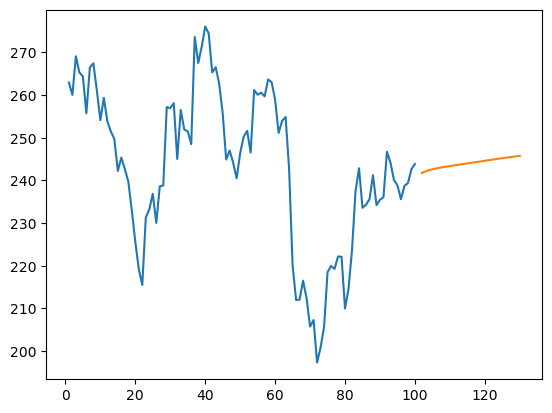

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(first_output))

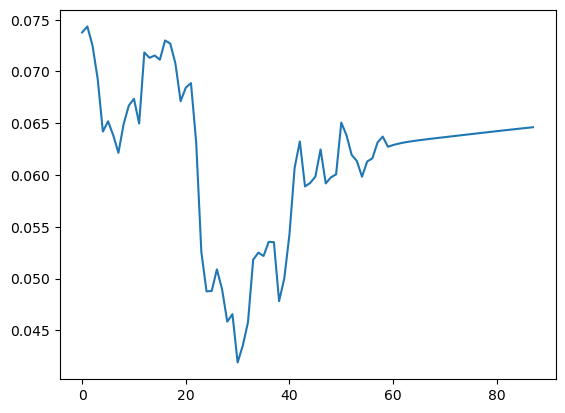

In [42]:
df3 = df1.tolist()
df3.extend(first_output)
plt.plot(df3[1200:])